In [8]:
from ipwhois import IPWhois
import ipwhois
import time
import socket
import requests
from lxml.html import fromstring

# !whois google.com
# !pip install ipwhois
# !pip install ipwhois==0.10.3
# !pip install pycountry
# !pip install pycountry_convert

# read about ASNs : https://www.arin.net/resources/registry/whois/

In [10]:
#this code get free proxies to use with get_ip()- might be helpful dont delete

import requests
import pandas as pd 

resp = requests.get('https://free-proxy-list.net/') 
df = pd.read_html(resp.text)[0]
proxy_list = df['IP Address'].to_list()
df

,IP Address,Port,Code,Country,Anonymity,Google,Https,Last Checked
0,194.8.218.100,8080,DE,Germany,elite proxy,yes,yes,24 secs ago
1,182.253.93.4,53281,ID,Indonesia,elite proxy,no,no,24 secs ago
2,115.75.70.79,4100,VN,Vietnam,elite proxy,no,yes,24 secs ago
3,151.248.117.248,80,RU,Russian Federation,elite proxy,yes,no,24 secs ago
4,195.154.119.182,80,FR,France,anonymous,no,no,24 secs ago
...,...,...,...,...,...,...,...,...
295,158.69.185.37,3129,CA,Canada,anonymous,no,yes,11 mins ago
296,44.226.199.133,80,US,United States,anonymous,yes,no,11 mins ago
297,117.54.114.97,80,ID,Indonesia,anonymous,no,no,11 mins ago
298,23.224.33.106,20354,US,United States,elite proxy,no,yes,11 mins ago


In [11]:
# # this block obtains free proxies from "free--proxy-list", get ip address of a game url with all of those ips
# # and performs who_is lookup for all obtained soruces ( different ips of same url )


# import requests
# from itertools import cycle

# #If you are copy pasting proxy ips, put in the list below
# #proxies = ['121.129.127.209:80', '124.41.215.238:45169', '185.93.3.123:8080', '194.182.64.67:3128', '106.0.38.174:8080', '163.172.175.210:3128', '13.92.196.150:8080']
# import requests
# from lxml.html import fromstring
# def get_proxies():
#     url = 'https://free-proxy-list.net/'
#     response = requests.get(url)
#     parser = fromstring(response.text)
#     proxies = set()
#     for i in parser.xpath('//tbody/tr')[:100]:
#         if i.xpath('.//td[7][contains(text(),"yes")]'):
#             #Grabbing IP and corresponding PORT
#             proxy = ":".join([i.xpath('.//td[1]/text()')[0], i.xpath('.//td[2]/text()')[0]])
#             proxies.add(proxy)
#     return list(proxies)
# # list_proxies = get_proxies()
# # list_proxies


# def get_ip_with_proxies(url):
#     url = "http://"+ url
# #     surl = "https://"+url
    
#     list_origins = []
    
#     for i in range(1,10):
# #           choose proxies returnes by the function
#             proxies = get_proxies() 
#             proxy = proxies[i]

#             print("chosen proxy from the pool is :", proxy)
#             print(f"Request{i}")

#             try:
#                 response = requests.get(url,proxies={"http://": proxy, "https://": proxy})
#                 if response.ok:
#                     print(response.text)
#                 list_origins.append(response.text)
#             except:
#                 #Most free proxies will often get connection errors. 
#                 #You will have retry the entire request using another proxy to work.
#                 print("Skipping... Connnection error")
#                 pass
#             time.sleep(2)
#     return list_origins

# def whois_ip(ip):
    
#     # Default to not found
#     cidr, ranges = "CIDR not found", "Range not found"
    
#     # Get whois for IP. Returns a list with dictionary
#     obj= IPWhois(ip) 
#     ip_dict = obj.lookup()

#     if ip_dict['nets'][0].get('cidr'):
#         cidr = ip_dict['nets'][0].get('cidr')

#     if ip_dict['nets'][0].get('range'):
#         ranges = ip_dict['nets'][0].get('range')

#     time.sleep(2)

In [12]:
#whois look up function with one local ip (no proxies)


def whois_ip(ip):
    
    # Default to not found
    cidr, ranges = "CIDR not found", "Range not found"
    
    # Get whois for IP. Returns a list with dictionary
    obj= IPWhois(ip) 
    ip_dict = obj.lookup()

    if ip_dict['nets'][0].get('cidr'):
        cidr = ip_dict['nets'][0].get('cidr')

    if ip_dict['nets'][0].get('range'):
        ranges = ip_dict['nets'][0].get('range')

    time.sleep(2)

    return ip_dict #cidr, ranges 


def get_all_ip(url):
    import socket
    ip_addres = socket.gethostbyname_ex(url)[2]
    return(ip_addres)
def get_one_ip(url):
    import socket
    ip_addres = socket.gethostbyname(url)
    return(ip_addres)

In [13]:
obj= IPWhois(get_one_ip(domain)) 
obj.lookup()

NameError: name 'domain' is not defined

In [14]:
import whois

domain='www.pyshark.com'

whois.whois(domain)['country']

'US'

# Driver code

In [36]:
df

,0
0,addictinggames.com
1,browsergameshub.com
2,de.gamepost.com
3,dotio.games
4,ea.pogo.com
...,...
1243,youxi.321freegames.com
1244,zh.boardgamearena.com
1245,zh.iogame.io
1246,zh.pog.com


In [37]:
#get the 1248 websites

import xlrd 
import time
import pandas as pd
import os

# rank_list = []  
# # loc = ("the_1248.xlsx") 
  
# df = pd.read_excel(
#      os.path.join("the_1248.xlsx"),
#      engine='openpyxl', header = None,
# )
# df = df.rename(columns={0: 'website'})
# urls_1248 = df['website'].tolist()
# urls_1248
df = pd.read_csv("output_files/mp_1248.csv",header = None)
urls_1248 = df[0].to_list()
# # rotate through the 1248 urls and get the ip and who is look up results with proxies
# for url in urls_1248:
#     print("website:", url)
#     try:
#         ip = get_one_ip(url) # will request url ip with all the returned proxies
#         print(ip)
#     except:
#         print("in error : ", url)
#         pass

# # when you get origins start using them to get the who is look up information
# #     for origin in list_origins:

In [38]:
# get the ip and who is look up results without proxies
# lst = []
# for row in df['website']:
#     print(row)
#     try:
#         ip = get_ip(row)
#         d = whois_ip(ip)
#         d['mp']=row
#         lst.append(d)
#         time.sleep(2)
#     except Exception as e: 
#         print(e)
#         d={"mp":row,"error":e}
#         lst.append(d)
#         pass

In [39]:
# write the results
# df2 = pd.DataFrame(lst)
# df2.to_csv("whoislookup_1248.csv",index=None)

In [40]:
# we query a game url with get_ip() to get the ip address, we use that ip address to get the who_is response.
# in paper we are looking at how many market places are located in a country.we are making a map with all
# the countries, and in which continet these asns are located.
# the map tells us how many asns are located in each continent and histogran tells us the same

# who-is look up results

In [41]:
# read the result and analyse the results
import pandas as pd
import pycountry
df2 = pd.read_csv("output_files/whoislookup_1248.csv")
df2

,query,nets,raw,referral,raw_referral,asn_registry,asn,asn_cidr,asn_country_code,asn_date,mp,error
0,104.22.2.109,"[{'cidr': '104.16.0.0/12', 'name': 'CLOUDFLARE...",NaN,NaN,NaN,arin,13335,104.22.0.0/20,US,2014-03-28,addictinggames.com,NaN
1,192.185.225.229,"[{'cidr': '192.185.0.0/16', 'name': 'HGBLOCK-1...",NaN,NaN,NaN,arin,46606,192.185.224.0/19,US,2013-07-22,browsergameshub.com,NaN
2,159.203.184.51,"[{'cidr': '159.203.0.0/16', 'name': 'DIGITALOC...",NaN,NaN,NaN,arin,14061,159.203.176.0/20,US,2015-08-10,de.gamepost.com,NaN
3,198.54.116.236,"[{'cidr': '198.54.112.0/20', 'name': 'NAMEC-4'...",NaN,NaN,NaN,arin,22612,198.54.112.0/20,US,2015-11-13,dotio.games,NaN
4,159.153.113.136,"[{'cidr': '159.153.0.0/16', 'name': 'EA', 'han...",NaN,NaN,NaN,arin,19541,159.153.112.0/21,US,1992-04-29,ea.pogo.com,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1243,89.111.52.142,"[{'cidr': '89.111.52.0/24', 'name': 'DEAC-COLO...",NaN,NaN,NaN,ripencc,12993,89.111.0.0/18,LV,2006-04-21,youxi.321freegames.com,NaN
1244,91.121.44.226,"[{'cidr': '91.121.32.0/19', 'name': 'OVH', 'ha...",NaN,NaN,NaN,ripencc,16276,91.121.0.0/16,FR,2006-09-20,zh.boardgamearena.com,NaN
1245,192.64.119.254,"[{'cidr': '192.64.112.0/21', 'name': 'NCNET-3'...",NaN,NaN,NaN,arin,22612,192.64.119.0/24,US,2012-12-17,zh.iogame.io,NaN
1246,162.243.169.120,"[{'cidr': '162.243.0.0/16', 'name': 'DIGITALOC...",NaN,NaN,NaN,arin,14061,162.243.160.0/20,US,2013-09-06,zh.pog.com,NaN


In [42]:
# anaysis of the whois look up results

In [43]:
# # look at all of the ip addresses in one country for possible actors behind them
# import ast
# lst_countries = df2['asn_country_code'].to_list()
# lst_countries = set([item for item in lst_countries if not(pd.isnull(item)) == True])
# lst_countries
# L = []
# for cntry in lst_countries:
#     temp = df2[df2['asn_country_code'] == cntry]
# #     print(temp)
#     for index,row in temp.iterrows():
# #         print(row['mp'])
# #         print(row['query'])
# #         print(ast.literal_eval(row['nets'])[0]['name'])
#         d = {"MP":row['mp'],"ip":row['query'],
#              'subnet':ast.literal_eval(row['nets'])[0]['cidr'],
#             "country":cntry}
#         L.append(d)
# df_sb = pd.DataFrame(L)
# df_sb


# # # # use this code to find out the websites in one country whoch are part of a subnet as well and look at them as a cluster
# print(set(df_sb['country']))
# c = 'LV'
# print(pycountry.countries.get(alpha_2=c).name)
# df_sb[df_sb['country'] == c].groupby('subnet').apply(print)

# plots

In [44]:
# data to plot the MAP for the paper

import pycountry
import pycountry_convert as pc
import math
import numpy as np
#take log 2 of number of ASNs in for the map plot
result = []

lst_countries = df2['asn_country_code'].to_list()
lst_countries = set([item for item in lst_countries if not(pd.isnull(item)) == True])
lst_countries

for cntry in lst_countries:
#     print(cntry)

    d = {'cntry_code': cntry,"cntry_name":pycountry.countries.get(alpha_2=cntry).name,
         'continent' : pc.convert_continent_code_to_continent_name(pc.country_alpha2_to_continent_code(cntry)),
         "nmbr_asn":len(df2[df2['asn_country_code']==cntry]),
         "nmbr_asn_log" : math.log2(len(df2[df2['asn_country_code']==cntry]))
        }
    result.append(d)

df = pd.DataFrame(result)
df = df.sort_values('nmbr_asn_log', ascending = False)
df.to_csv("contryinfo_1248.csv",index= False)
# df.groupby('continent').sum()
df

,cntry_code,cntry_name,continent,nmbr_asn,nmbr_asn_log
19,US,United States,North America,721,9.493855
7,DE,Germany,Europe,72,6.169925
18,FR,France,Europe,63,5.977280
26,NL,Netherlands,Europe,52,5.700440
32,CA,Canada,North America,31,4.954196
25,RU,Russian Federation,Europe,26,4.700440
3,TR,Turkey,Asia,25,4.643856
0,RO,Romania,Europe,22,4.459432
11,JP,Japan,Asia,16,4.000000
9,PL,Poland,Europe,15,3.906891


<ipython-input-62-5c6400cec015>:31: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='grey', linestyle='-',alpha = 0.3)


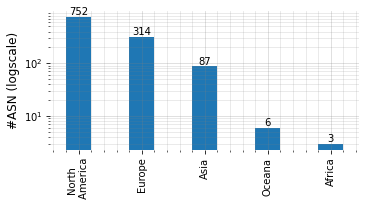

In [62]:
import matplotlib.pyplot as plt





def name(x):
    if x == 'North America':
        return 'North \n America'
    return x
log = df.groupby('continent', as_index = False)['nmbr_asn'].sum();

log['nmbr_asn'] = log['nmbr_asn']
log['continent'] = log['continent'].apply(lambda x: name(x))
log = log.sort_values('nmbr_asn', ascending=False)

pl = log.plot(kind="bar",color = "tab:blue",width=0.4,figsize=(5,2.8),legend=False)
pl.set_ylabel("#ASN (logscale)",fontsize = 12)
# pl.set_xlabel('Continents',fontsize = 12)

for bars in pl.containers:
    pl.bar_label(bars)

# ax.set(xlim=(0, max(plot_data)))
pl.tick_params(axis='x', direction='out', length=4, bottom = True)
pl.tick_params(axis='y', direction='out', length=4, left=True)



plt.grid()
plt.grid(b=True, which='major', color='grey', linestyle='-',alpha = 0.3)
plt.grid(which='minor', color='grey', alpha=0.2)
plt.minorticks_on()

plt.box(False)
plt.tight_layout()

plt.yscale('log')
# plt.legend(['#ASNs'],frameon = False,fontsize = 12);
pl.set_xticklabels(['North \n America', 'Europe', 'Asia', 'Oceana', 'Africa'])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig("asns_per_continent.pdf")

# rsync -avz hina@hina.science.mq.edu.au:/data/iogames_code/2_marketplace_analysis/asns_per_continent.pdf /home/hinaqayyum/Desktop/



In [46]:
# look at all of the ip addresses in one country for possible same owner behind them
import ast
lst_countries = df2['asn_country_code'].to_list()
lst_countries = set([item for item in lst_countries if not(pd.isnull(item)) == True])
lst_countries
L = []
for cntry in lst_countries:
    temp = df2[df2['asn_country_code'] == cntry]
#     print(temp)
    for index,row in temp.iterrows():
        d = {"MP":row['mp'],"ip":row['query'],
             'asn_no':row['asn'],
            "country":cntry, 'subnet':ast.literal_eval(row['nets'])[0]['name']}
        L.append(d)
df_sb = pd.DataFrame(L)
df_sb

,MP,ip,asn_no,country,subnet
0,www.wowsomegames.com,82.77.199.11,8708,RO,RO-RCS-RDS
1,friv.k5.ro,89.42.216.171,205275,RO,RO-ROMARGSRL-20051129
2,ijocurigratis.com,89.42.218.25,205275,RO,RO-ROMARGSRL-20051129
3,jocuri.apropotv.ro,93.113.11.165,8751,RO,SC-MEDIA-SAT-SRL
4,jocuri-aparate-pacanele.com,176.126.200.13,44043,RO,HOSTVISION-SRL
...,...,...,...,...,...
1157,www.jocuriaparate-gratis.com,45.13.252.198,47583,CY,HOSTINGER-HOSTING
1158,choigame.club,171.244.23.233,7552,VN,VIETTEL-VN
1159,gamevivu.com,171.244.10.77,38731,VN,VIETTEL-VN
1160,choigame.biz,103.130.212.186,135953,VN,BKHOST-VN


In [47]:
# possible cluster ownership- asn based clusters of 1248 MPs
import pandas as pd

D = pd.DataFrame(columns = ['MP','ip','asn_no','country','subnet',])
C = list(set(df_sb['country']))

for c in C:
#     print('country', c)
    df_temp = df_sb.loc[df_sb['country'] == c]
    asns = list(df_temp['asn_no'].unique())
    for asn in asns:
        df_temp2 = df_temp[df_temp['asn_no'] == asn]
        if len(df_temp2) >= 2:
            D = D.append(df_temp2, ignore_index=True)
#             print(D)
D.to_csv("mp_clusters_per_asn.csv", index = False )
D

<ipython-input-47-11821f91eafc>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  D = D.append(df_temp2, ignore_index=True)


,MP,ip,asn_no,country,subnet
0,www.wowsomegames.com,82.77.199.11,8708,RO,RO-RCS-RDS
1,www.jocuripenet.ro,86.126.216.137,8708,RO,RO-RCS-RDS
2,www.miniclip.ro,86.120.119.160,8708,RO,RO-RCS-RDS
3,www.bestdailygames.com,82.77.199.11,8708,RO,RO-RCS-RDS
4,zumy.ro,82.79.229.68,8708,RO,RO-PH-BALALAU-20151210
...,...,...,...,...,...
1010,www.spiele123.com,46.19.8.134,51790,SI,SIEL-customers
1011,www.solitaire-gratuits.com,94.237.88.91,202053,FI,UPCLOUD-DE-FRA1-NET3
1012,www.solitario-gioco.com,94.237.88.91,202053,FI,UPCLOUD-DE-FRA1-NET3
1013,jefriv.com,31.170.164.59,47583,CY,HOSTINGER-HOSTING


In [48]:
## how many asns have more then one entries???
print("ASNs",'     MPs')
D['asn_no'].value_counts()

# print clusters by asn mumber
# grpd = D.groupby(['asn_no'])
# for g in grpd:
#     print(g)

## look at any one asn
# D[D['asn_no'] == '13335']

## how many unique IPs in one asn
# tmp = D[D['asn_no'] == '13335']
# len(tmp['ip'].value_counts())

# # list of MPs in registered to any one asn
# MP_13335 = tmp['MP'].tolist()
# pd.DataFrame(MP_13335).to_csv("mp_in_asn13335.csv", index = False)

ASNs      MPs


13335     397
16276      77
16509      51
14061      44
14618      37
         ... 
18501       2
63210       2
54994       2
398101      2
202053      2
Name: asn_no, Length: 94, dtype: int64

#Conclusion: I found 94 clusters of websites, where more then 1 MPs are registered with same asn. Biggest cluster is with asn number 13335. it is located in US. it has 397 MPs registered with it, all have the same subnet identifier "CLOUDFLARENET" with 359 unique IP addresses. There are aliases of website and completely different websites.
HTML similarity?
availability of pp?
same pp text?
same language?

In [27]:
df_print = D['asn_no'].value_counts()
df_print = df_print.reset_index()
df_print.columns  = ['ASN_no', 'Reg No. of MPs']
print(df_print.to_latex(index=False))
df_print

\begin{tabular}{lr}
\toprule
ASN\_no &  Reg No. of MPs \\
\midrule
 13335 &             397 \\
 16276 &              77 \\
 16509 &              51 \\
 14061 &              44 \\
 14618 &              37 \\
 24940 &              22 \\
 20940 &              17 \\
 15169 &              13 \\
 54113 &              13 \\
  8560 &              13 \\
 12993 &              12 \\
 22612 &              12 \\
 20559 &              12 \\
 46606 &              11 \\
 32244 &              11 \\
 20473 &               9 \\
 51559 &               9 \\
 63949 &               8 \\
 45102 &               8 \\
  8075 &               7 \\
 16625 &               7 \\
 48635 &               7 \\
 12876 &               7 \\
 60955 &               6 \\
 20446 &               6 \\
396982 &               6 \\
 50673 &               6 \\
205275 &               5 \\
 31034 &               5 \\
  8708 &               5 \\
  9370 &               5 \\
131965 &               5 \\
 36351 &               4 \\
  4766 & 

<ipython-input-27-62bf8a205822>:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_print.to_latex(index=False))


,ASN_no,Reg No. of MPs
0,13335,397
1,16276,77
2,16509,51
3,14061,44
4,14618,37
...,...,...
89,18501,2
90,63210,2
91,54994,2
92,398101,2


In [28]:
print(df_print[:5].to_latex(index=False))

\begin{tabular}{lr}
\toprule
ASN\_no &  Reg No. of MPs \\
\midrule
 13335 &             397 \\
 16276 &              77 \\
 16509 &              51 \\
 14061 &              44 \\
 14618 &              37 \\
\bottomrule
\end{tabular}



<ipython-input-28-496faaf8a81d>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_print[:5].to_latex(index=False))


In [29]:
# look at the biggest cluster
D[D['asn_no']=='13335']['MP'].to_list()
# len(D[D['asn_no']=='13335']['MP'].unique())

['addictinggames.com',
 'free-games.hu',
 'friv.games',
 'www.armorgames.com',
 'www.gameflare.com',
 'www.jatekokxl.hu',
 'www.typinggames.zone',
 'www.wordgames.com',
 'www.wowescape.com',
 'apkpure.com',
 'armorgames.com',
 'browsermmorpg.com',
 'caygames.com',
 'clavejuegos.com',
 'emulatoronline.com',
 'frvr.com',
 'games.mi9.com',
 'insanegames.io',
 'iogames.onl',
 'iogames.space',
 'iogames.top',
 'ioxgames.com',
 'it.crazygames.com',
 'keygames.com',
 'kizi.com',
 'lagged.com',
 'm.fog.com',
 'mariogames.io',
 'oyungemisi.com',
 'papergames.io',
 'plarium.com',
 'playgamesio.net',
 'playmariogames.com',
 'playpager.com',
 'poki.com',
 'poki.com.br',
 'poki.it',
 'poki.jp',
 'poki.ro',
 'spele.nl',
 'spielspiele.de',
 'superhex.io',
 'titotu.io',
 'topwebgames.com',
 'www.1001juegos.com',
 'www.365escape.com',
 'www.4j.com',
 'www.addictinggames.com',
 'www.bestgames.com',
 'www.bgames.com',
 'www.box10.com',
 'www.crazygames.com',
 'www.crazygames.com.br',
 'www.crazygames.fr'

In [30]:
len(D[D['asn_no']=='13335']['ip'].unique())

359

# utils

In [ ]:
# # Fully qualified domain names in case we need them for anything- not using currently

# import socket
# import pandas as pd

# dfr = pd.read_csv("mp_1248.csv",header = None)
# col = dfr[0].to_list()

# # Get FQN for example.net
# L = []
# for wb in col:
#     try:
#         fqdn = socket.getfqdn(wb);
#         print(wb)
#     #     print("Fully qualified domain name of %s is:", fqdn);
#     #     print()
#         d = {'mp':wb,"FQDN": fqdn}
#         L.append(d)
#     except:
#         d = {'mp':wb,"FQDN": "could not resolve"}
#         L.append(d)
#         pass
        
# df_fqdn = pd.DataFrame (L)
# df_fqdn.to_csv("fqdn_1248.csv",index=False)
# df_fqdn
# # code to read df_fqdn in a nice way
# for index, row in df_fqdn.iterrows():
#     if row[0] == row[1]:
#         pass
#     else:
#         print('--mp:',row[0],'---FQDN---',row[1])

In [ ]:
# check if an address is ipv4 or ipv6

import socket

def is_valid_ipv4_address(address):
    try:
        socket.inet_pton(socket.AF_INET, address)
    except AttributeError:  # no inet_pton here, sorry
        try:
            socket.inet_aton(address)
        except socket.error:
            return False
        return address.count('.') == 3
    except socket.error:  # not a valid address
        return False

    return True

def is_valid_ipv6_address(address):
    try:
        socket.inet_pton(socket.AF_INET6, address)
    except socket.error:  # not a valid address
        return False
    return True

is_valid_ipv6_address('172.67.134.191')

# notes